In [1]:
%matplotlib inline
# Python dependences
import os, time
import numpy as np   # Numpy - Python's numerical library
import matplotlib.pyplot as plt  # Matplotlib - Python's plotting library
from copy import deepcopy   # Python module for copying objects
# Input and Output Tools
# Catalogue and sources 
#from hmtk.parsers.catalogue import CsvCatalogueParser   # Reads an earthquake catalogue from CSV
#from hmtk.parsers.catalogue.csv_catalogue_parser import CsvCatalogueWriter  # Writes an earthquake catalogue to CSV
from hmtk.parsers.source_model.nrml04_parser import nrmlSourceModelParser  # Imports a source model from XML

# Plotting tools
from hmtk.plotting.mapping import HMTKBaseMap

#from hmtk.plotting.seismicity.completeness import plot_stepp_1972
#from hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_time_scatter
###from hmtk.plotting.seismicity.catalogue_plots import plot_depth_histogram
#from hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_time_density
#from hmtk.plotting.seismicity.max_magnitude.cumulative_moment import plot_cumulative_moment 
#from hmtk.plotting.seismicity.catalogue_plots import (plot_observed_recurrence, 
#                                                      get_completeness_adjusted_table,
#                                                      _get_catalogue_bin_limits)
#from hmtk.plotting.seismicity.occurrence.recurrence_plot import plot_recurrence_model

Continuous distributions not available on Scipy version < 0.15
Bootstrap sampling of the depth distribution will raise an error


In [2]:
# Load Mark's source model file
path = '/nas/gemd/ehp/georisk_earthquake/hazard/NSHM_18/PSHA_modelling/oq_inputs/leonard'
#path = '.'
source_model_file = os.path.join(path, 'source_model_leonard_2008.xml')
parser = nrmlSourceModelParser(source_model_file)

# Parse the seismic sources and save them into a variable called "source_model"
source_model = parser.read_file("Leonard 2008 Source Model") # You need to supply a name for the source model

In [3]:
"""# Load source model file
source_model_file = os.path.join(path, 'source_model_leonard_new.xml')
parser = nrmlSourceModelParser(source_model_file)

# Parse the seismic sources and save them into a variable called "source_model"
source_model_tv = parser.read_file("Leonard 2008 Source Model Theodora implementation") # You need to supply a name for the source model
"""

'# Load source model file\nsource_model_file = os.path.join(path, \'source_model_leonard_new.xml\')\nparser = nrmlSourceModelParser(source_model_file)\n\n# Parse the seismic sources and save them into a variable called "source_model"\nsource_model_tv = parser.read_file("Leonard 2008 Source Model Theodora implementation") # You need to supply a name for the source model\n'

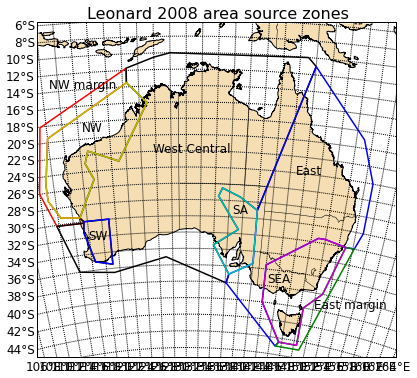

In [5]:
# Plot the polygons
llon, ulon, llat, ulat = 105, 155, -45, -5,
map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
              'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat), 'resolution':'i'}

basemap1 = HMTKBaseMap(map_config, 'Leonard 2008 area source zones')
# Adding the seismic sources
borders = ['r-', 'k-', 'b-', 'g-', 'y-', 'c-', 'm-', 'b-']
i=0
for source in source_model:
 #   source.
    basemap1._plot_area_source(source, border=borders[i], border_width=1.5)#, alpha=0.5) 
    #print source.name
    i+=1
basemap1.fig.text(0.4, 0.6, 'West Central', fontsize=12)
basemap1.fig.text(0.22, 0.75, 'NW margin', fontsize=12)
basemap1.fig.text(0.65, 0.55, 'East', fontsize=12)
basemap1.fig.text(0.68, 0.24, 'East margin', fontsize=12)
basemap1.fig.text(0.29, 0.4, 'SW', fontsize=12)
basemap1.fig.text(0.54, 0.46, 'SA', fontsize=12)
basemap1.fig.text(0.6, 0.3, 'SEA', fontsize=12)
basemap1.fig.text(0.28, 0.65, 'NW', fontsize=12)


In [6]:
basemap1.savemap(os.path.join(path, 'Leonard_2008_sources.png'))